<a href="https://colab.research.google.com/github/JCaballerot/Estadistica_para_la_ciencia_de_datos/blob/main/estadistica_descriptiva/caso_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de dataset

In [1]:
# Importando librerías

import pandas as pd
import numpy as np


In [2]:
# Leyendo la base de datos

pddf = pd.read_csv('bank.csv')
pddf.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Análisis de Datos

In [ ]:
pddf.shape

(11162, 17)

In [ ]:
len(pddf)

11162

In [ ]:
pddf['age']

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64

## media

In [ ]:
pddf['age'].mean()

41.231947679627304

In [ ]:
pddf.groupby('marital')['age'].mean()

marital
divorced    47.365043
married     44.533617
single      33.017339
Name: age, dtype: float64

In [ ]:
pddf.groupby('marital')['age'].count()

marital
divorced    1293
married     6351
single      3518
Name: age, dtype: int64

## mediana

In [ ]:
pddf['age'].median()

39.0

In [ ]:
pddf.sort_values(by = 'age', ascending = False)['age']

1582    95
3756    93
3822    93
3098    92
2802    92
        ..
3494    18
4219    18
2498    18
2464    18
3174    18
Name: age, Length: 11162, dtype: int64

## Cuantiles

In [ ]:
np.percentile(pddf.age, 50)

39.0

In [ ]:
np.percentile(pddf.age, 75)
# El 75% de los clientes tiene menos de 49 años


49.0

In [ ]:
np.percentile(pddf.age, 25)
# El 75% de los clientes tiene más de 32 años

32.0

In [ ]:
# el 50% de los clientes tienen entre 32 y 49 años

In [ ]:
np.percentile(pddf.age, 10)

28.0

In [ ]:
np.percentile(pddf.age, 90)

58.0

In [ ]:
# el 80% de los clientes tienen entre 28 y 58 años

## Moda

In [ ]:
pddf.groupby('marital')['age'].count()

marital
divorced    1293
married     6351
single      3518
Name: age, dtype: int64

## Rangos 

In [6]:
maximo = pddf['age'].max()
minimo = pddf['age'].min()
amplitud = maximo - minimo
rangos = 5
amplitud_rango = amplitud/rangos
amplitud_rango

15.4

In [5]:
def rango_edad(x):
  if x <= 33:
    return 'a. 18 - 33'
  elif x <= 48:
    return 'b. 34 - 48'
  elif x <= 63:
    return 'c. 49 - 63'    
  elif x <= 78:
    return 'd. 64 - 78'
  else:
    return 'e- 78 - 95'
    

In [7]:
pddf['rango_edad'] = pddf.age.apply(lambda x: rango_edad(x))

In [8]:
pddf.groupby('rango_edad')['age'].count()

rango_edad
a. 18 - 33    3444
b. 34 - 48    4812
c. 49 - 63    2444
d. 64 - 78     380
e- 78 - 95      82
Name: age, dtype: int64

<Axes: >

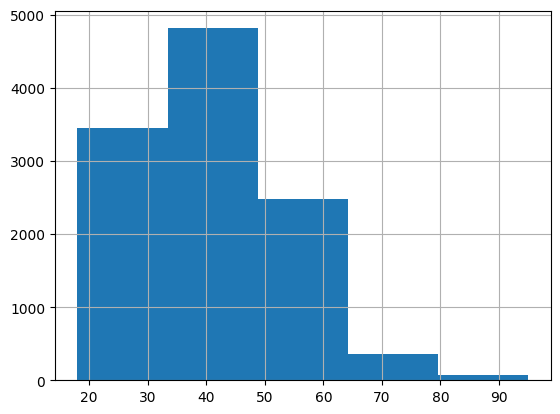

In [ ]:
pddf.age.hist(bins = 5)

In [9]:
from sklearn.preprocessing import KBinsDiscretizer 

In [ ]:
# fit: hacer el cálculo del procedimiento.
# transform: Usa el objeto entrenado
# fit_transform: Realiza el cálculo y además usa el objeto.

In [34]:
# Discretizar variables

from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 5, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(pddf[['age', 'duration']])


In [36]:
pddf[['age_cat', 'duration_cat']] = discretizer.transform(pddf[['age', 'duration']])

In [37]:
pddf[['age_cat', 'duration_cat']].head()

,age_cat,duration_cat
0,2.0,1.0
1,2.0,1.0
2,1.0,1.0
3,2.0,0.0
4,2.0,0.0


In [38]:
pddf.groupby('age_cat')['age'].count()

age_cat
0.0    3444
1.0    4812
2.0    2481
3.0     353
4.0      72
Name: age, dtype: int64

## Boxplot

In [39]:
import seaborn as sns

<Axes: xlabel='age'>

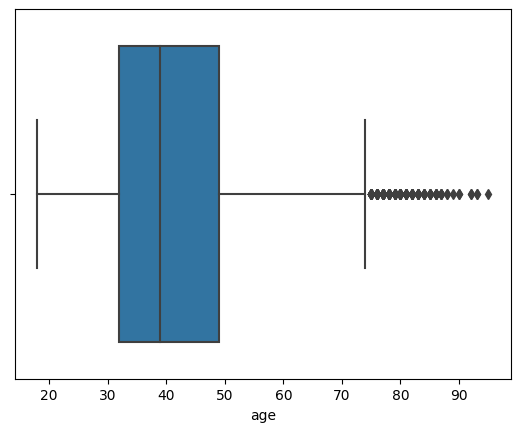

In [42]:
sns.boxplot(data = pddf, x = 'age')

In [47]:
Q3 = np.percentile(pddf.age, 75)
Q1 = np.percentile(pddf.age, 25)
RIC = Q3 - Q1

upper_limit = Q3 + 1.5*RIC
lower_limit = Q1 - 1.5*RIC

print(f'El límite superior de los datos es: {upper_limit}')
print(f'El límite inferior de los datos es: {lower_limit}')

El límite superior de los datos es: 74.5
El límite inferior de los datos es: 6.5


## Desviación estándar

In [49]:
pddf.age.mean()

41.231947679627304

In [48]:
pddf.age.std()

11.913369192215526

Los datos en promedio se encuentran entre 41 - 12 = 29 y 41 + 12 = 53 años

In [51]:
pddf.duration.mean()

371.99381831213043

In [52]:
pddf.duration.std()

347.12838571630584